<a href="https://colab.research.google.com/github/JuJu2181/LearnML/blob/master/ML_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DAY 3: 
### Type 1: Linear Regression
Linear regression uses a straight line to fit a linear data
- Pumpkin Pricing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading data 
pumpkins  = pd.read_csv('https://raw.githubusercontent.com/JuJu2181/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
#extracting the pumpkins with package bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
new_columns = ['Package','Variety','City Name','Month','Low Price','High Price','Date','City Num','Variety Num']
#removing all unnecessary columns
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
#calculating the average price 
price = (pumpkins['Low Price']+pumpkins['High Price'])/2
#extracting month fomr the date 
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
#updating the price of the package based on 1 1/9 or 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = price*2
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


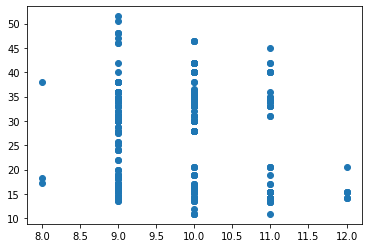

In [4]:
#basic scatterplot of the data
plt.scatter('Month','Price',data=new_pumpkins)

In [5]:
#Using Scikit Learn to predict which package of pumpkin will have best pumpkin price 
from sklearn.preprocessing import LabelEncoder
# converting all strings to numeric values
new_pumpkins.iloc[:,0:-1] = new_pumpkins.iloc[:,0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364


In [6]:
#drop all null data 
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int64  
 2   City        415 non-null    int64  
 3   Package     415 non-null    int64  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 25.9 KB


In [8]:
#creating a dataframe from only package and price as we are building a model to predict price of a package 
new_columns = ['Package','Price']
lin_pumpkins = new_pumpkins.drop([c for  c in new_pumpkins.columns if c not in new_columns],axis='columns')
lin_pumpkins

,Package,Price
70,0,13.636364
71,0,16.363636
72,0,16.363636
73,0,15.454545
74,0,13.636364
...,...,...
1738,2,30.000000
1739,2,28.750000
1740,2,25.750000
1741,2,24.000000


In [9]:
#Assiging X and y to feature and label 
X = lin_pumpkins.values[:,:1]
y = lin_pumpkins.values[:,1:2]

In [11]:
#building regression model using scikit learn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#splitting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#linear regression model
lin_reg = LinearRegression()
#fitting the model using training data 
lin_reg.fit(X_train,y_train)

#using the model to predict values of y based on test values of X
prediction = lin_reg.predict(X_test)
print(prediction)

#calculating accuracy score
accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ',accuracy_score)

[[34.33429787]
 [20.20144037]
 [39.04525038]
 [39.04525038]
 [24.91239287]
 [24.91239287]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [34.33429787]
 [20.20144037]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [39.04525038]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [24.91239287]
 [29.62334537]
 [34.33429787]
 [20.20144037]
 [39.04525038]
 [34.33429787]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [29.62334537]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [20.20144037]
 [39.04525038]
 [29.62334537]
 [20.20144037]
 [29.62334537]
 [39.04525038]
 [29.62334537]
 [24.91239287]
 [29.62334537]
 [20.20144037]
 [20.20144037]
 [29.62334537]
 [29.62334

Here the low accuracy of the model is because of less correlation in the data

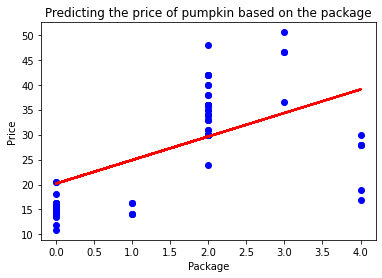

In [12]:
#visualizing the line that's drawn in the process
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,prediction,color='red',linewidth=2)

plt.xlabel('Package')
plt.ylabel('Price')
plt.title('Predicting the price of pumpkin based on the package')

plt.show()

In [13]:
#testing the model against a hypothetical variety
lin_reg.predict(np.array([[2.75]]))

array([[33.15655975]])

In [22]:
#checking the metrics off the model
print('MAE: ',mean_absolute_error(y_test,prediction))
print('MSE: ',mean_squared_error(y_test,prediction))
print('R2 Score: ',r2_score(y_test,prediction))


MAE:  6.548360965286833
MSE:  61.80385495574707
R2 Score:  0.4681102208278508


### Type 2: Polynomial Regression
Polynomial regression uses curved line to best fit non linear data

In [23]:
#recreating the dataframe from original pumpkin data 
new_columns = ['Variety','Package','City','Month','Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns],axis=1)
poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.636364
71,1,3,1,0,16.363636
72,2,3,1,0,16.363636
73,2,3,1,0,15.454545
74,2,3,1,0,13.636364
...,...,...,...,...,...
1738,1,1,9,2,30.000000
1739,1,1,9,2,28.750000
1740,1,1,9,2,25.750000
1741,1,1,9,2,24.000000


To visualize the correlations between the data in dataframes is by using the coolwarm chart

In [24]:
#Using coolwarm chart for visualization
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.606171
Price,-0.148783,-0.863479,0.323640,0.606171,1.000000


Scikit learn has a helpful API for building polynomial regression models the make_pipeline API. A pipeline is created with a chain of estimators. Here pipeline consists of polynomial features, or predictions that form a non linear path

In [26]:
#building X and y from package and price respectively
X = poly_pumpkins.iloc[:,3:4].values
y = poly_pumpkins.iloc[:,4:5].values 

In [27]:
#creating a pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

#using make_pipeline to create a model for polynomial regression
pipeline = make_pipeline(PolynomialFeatures(4),LinearRegression())

#splitting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#fitting the model
pipeline.fit(np.array(X_train),y_train)

y_pred = pipeline.predict(X_test)

We now need to create a new dataframe wita sorted data so that pipeline can create a sequence

[[ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 0.         15.82902893]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 1.         14.84848485]
 [ 2.         34.2974359 ]
 [ 2.         34.2974359 ]
 [ 2.         34.2974359 ]
 

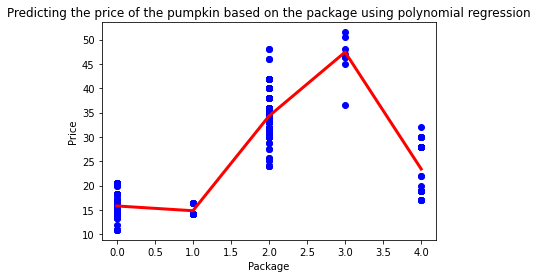

In [29]:
#Creating a sequence
df = pd.DataFrame({'x':X_test[:,0],'y':y_pred[:,0]})
#inplace=True means the current dataframe will be modifiec
df.sort_values(by='x',inplace=True)
# converting dataframe to numpy array
points = pd.DataFrame(df).to_numpy()
print(points)
#creating a scatterplot to visualize the polynomial regression
plt.scatter(X,y,color="blue")
plt.plot(points[:,0],points[:,1],color="red",linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.title('Predicting the price of the pumpkin based on the package using polynomial regression')
plt.show()

In [30]:
#Checking model accuracy and errors 
accuracy_score = pipeline.score(X_train,y_train)
print(f'Model Accuracy: {accuracy_score}')
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('R2 Score: ',r2_score(y_test,y_pred))

Model Accuracy: 0.8537946517073784
MAE:  2.6809494597136663
MSE:  14.584047030729515
R2 Score:  0.8744883218018484


In [31]:
#predicting the price of pumpkin 
pipeline.predict(np.array([[2.75]]))

array([[46.34509342]])

So Polynomial Regression works better for predicting price of pumpkin that linear regression in this dataset